# Import pacakges

In [1]:
from WEB import *

/Users/zhengshucheng/Desktop/中研院/QEB/WEB/utils.py:14: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


# Real data

Initial value

In [2]:
PROTEIN = "6z6u"
EM_MAP = "11103"

read data

In [3]:
web = WEB(start_radius=0, max_radius=1, gap=0.2)
data = web.read_data(
    root_map=f'./dataset/emd_{EM_MAP}.mrc', 
    root_pdb=f'./dataset/{PROTEIN}.pdb',
    atomic="CA",
    base_num_points=10, 
    max_points=1000
    )

  0%|          | 0/4128 [00:00<?, ?it/s]

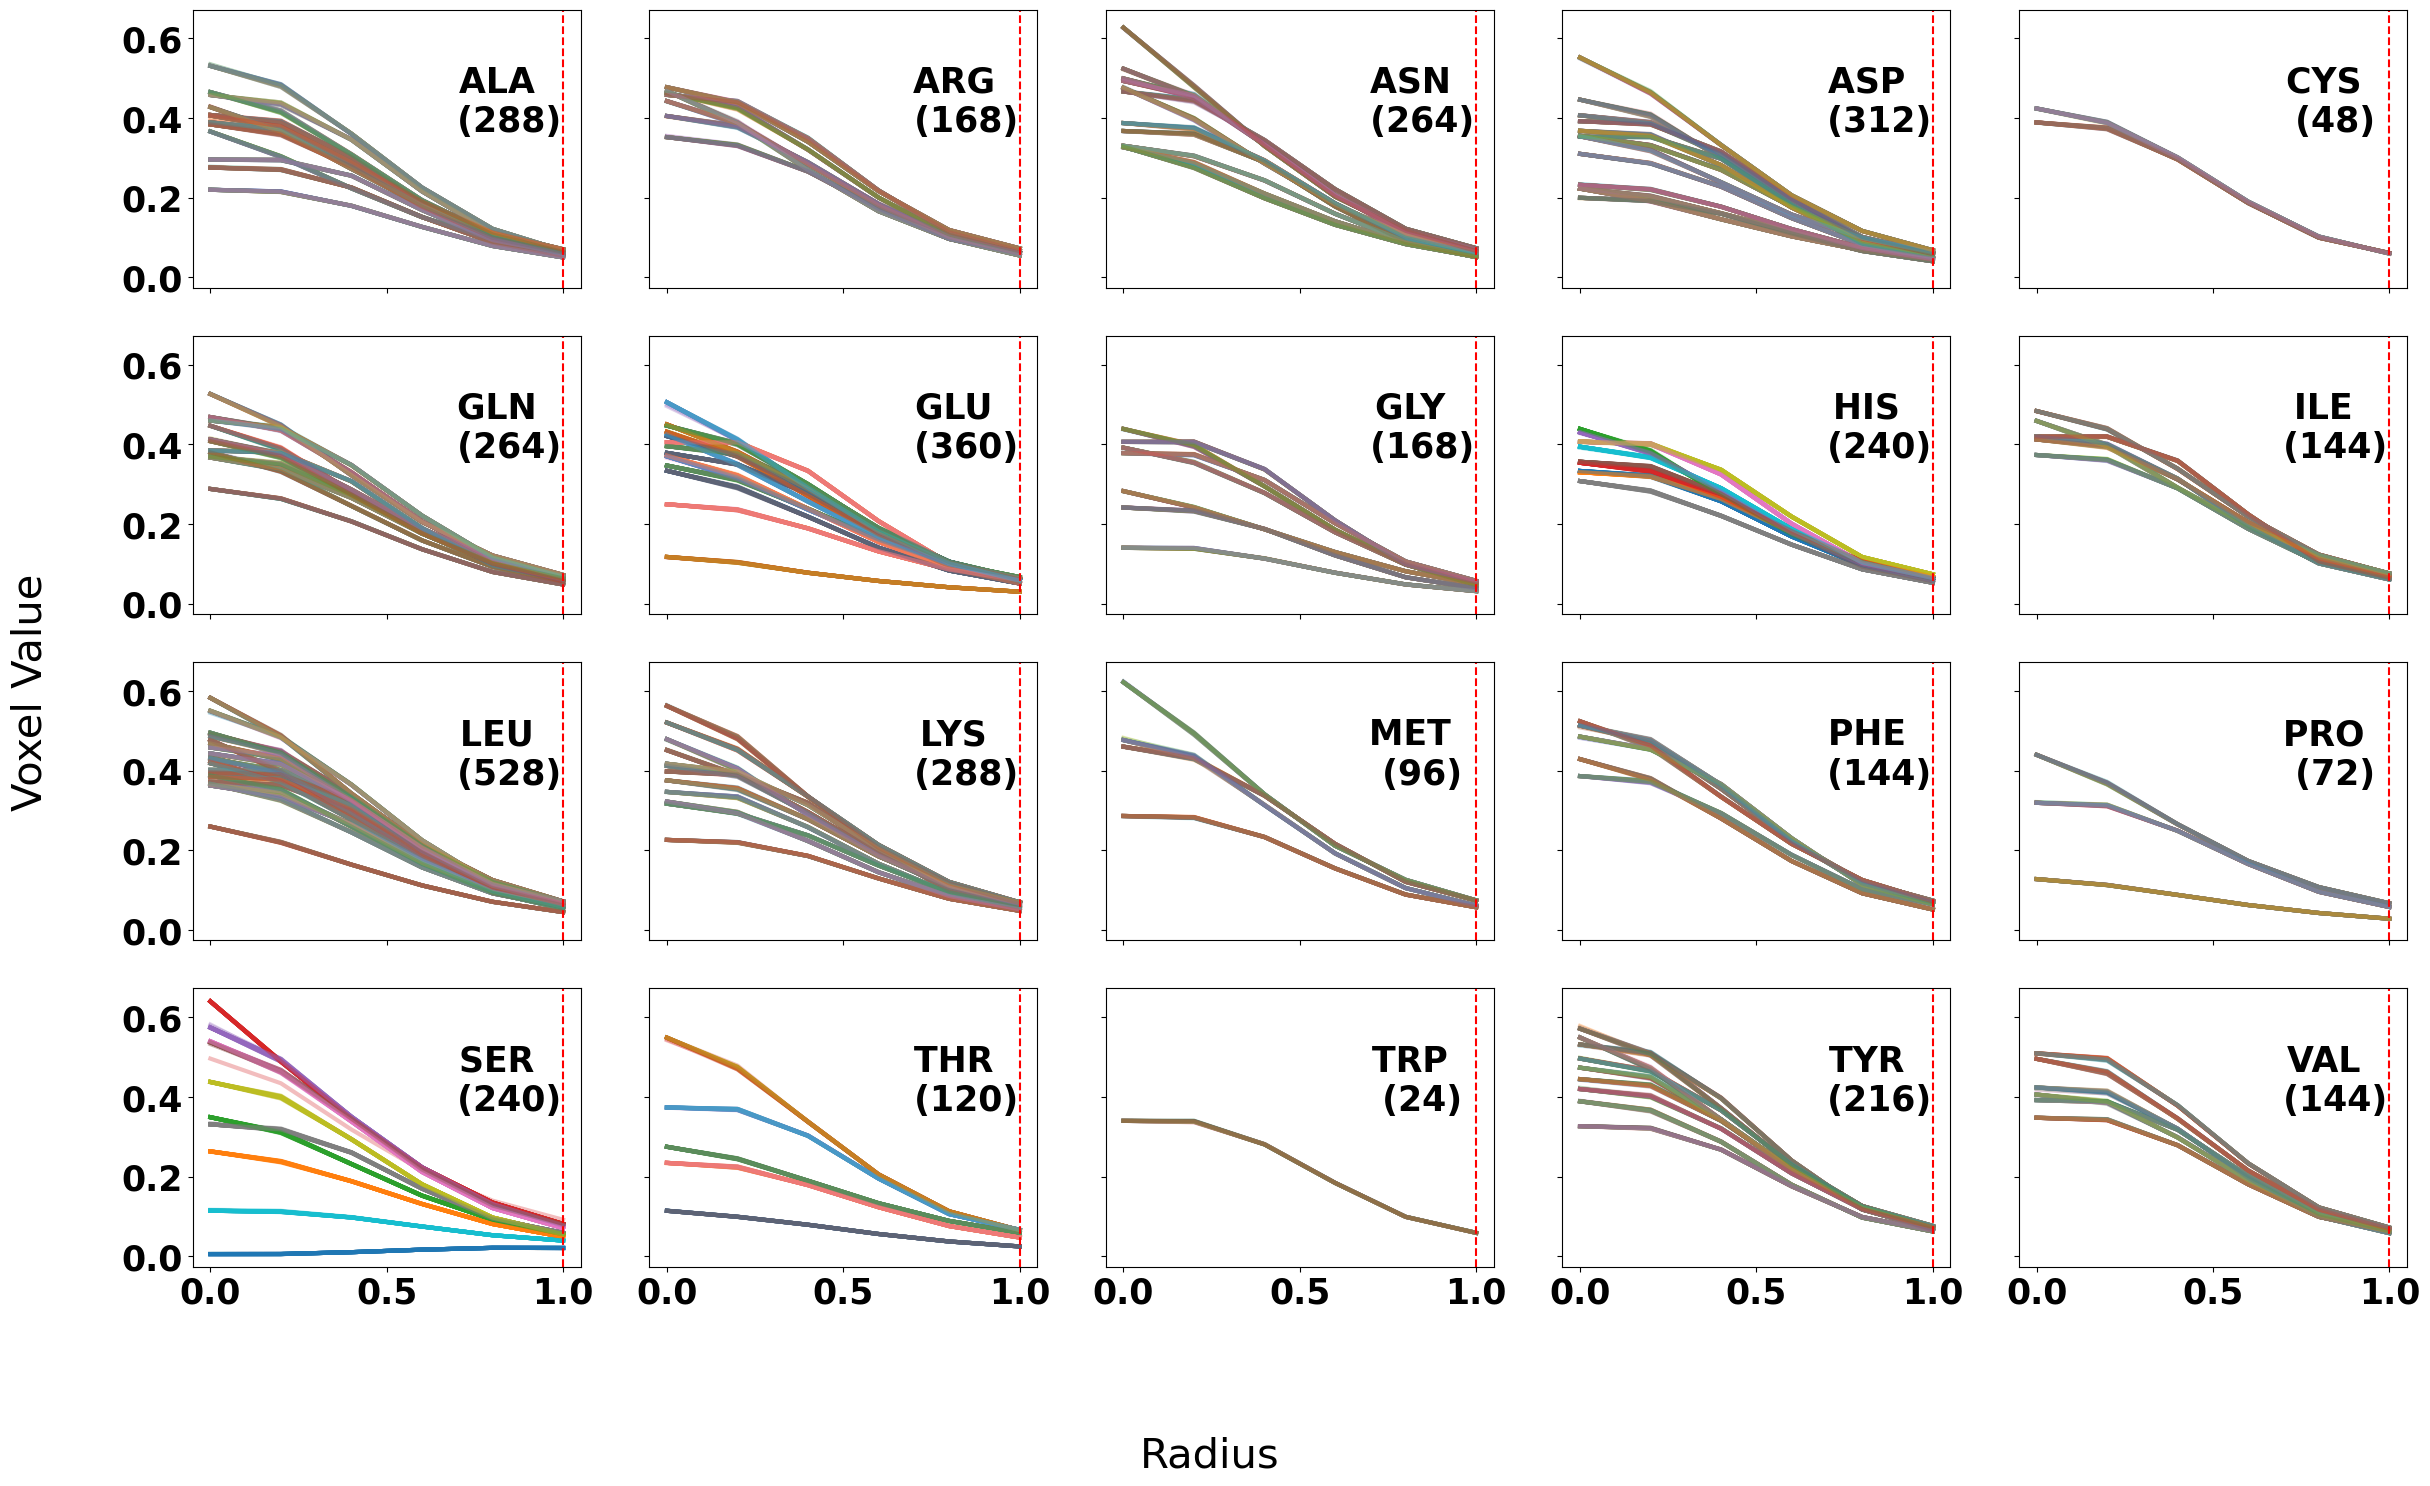

In [4]:
web.densities_plot(f"./figures/densities_plot_{PROTEIN}_{EM_MAP}")

Fit our model

In [5]:
_ = web.paramters_initial()
betas_WEB, histories = web.WEB_iter(max_iter=20, alpha=0.1, gamma=0.1, tol=1e-5)

  0%|          | 0/20 [00:00<?, ?it/s]

Plot results

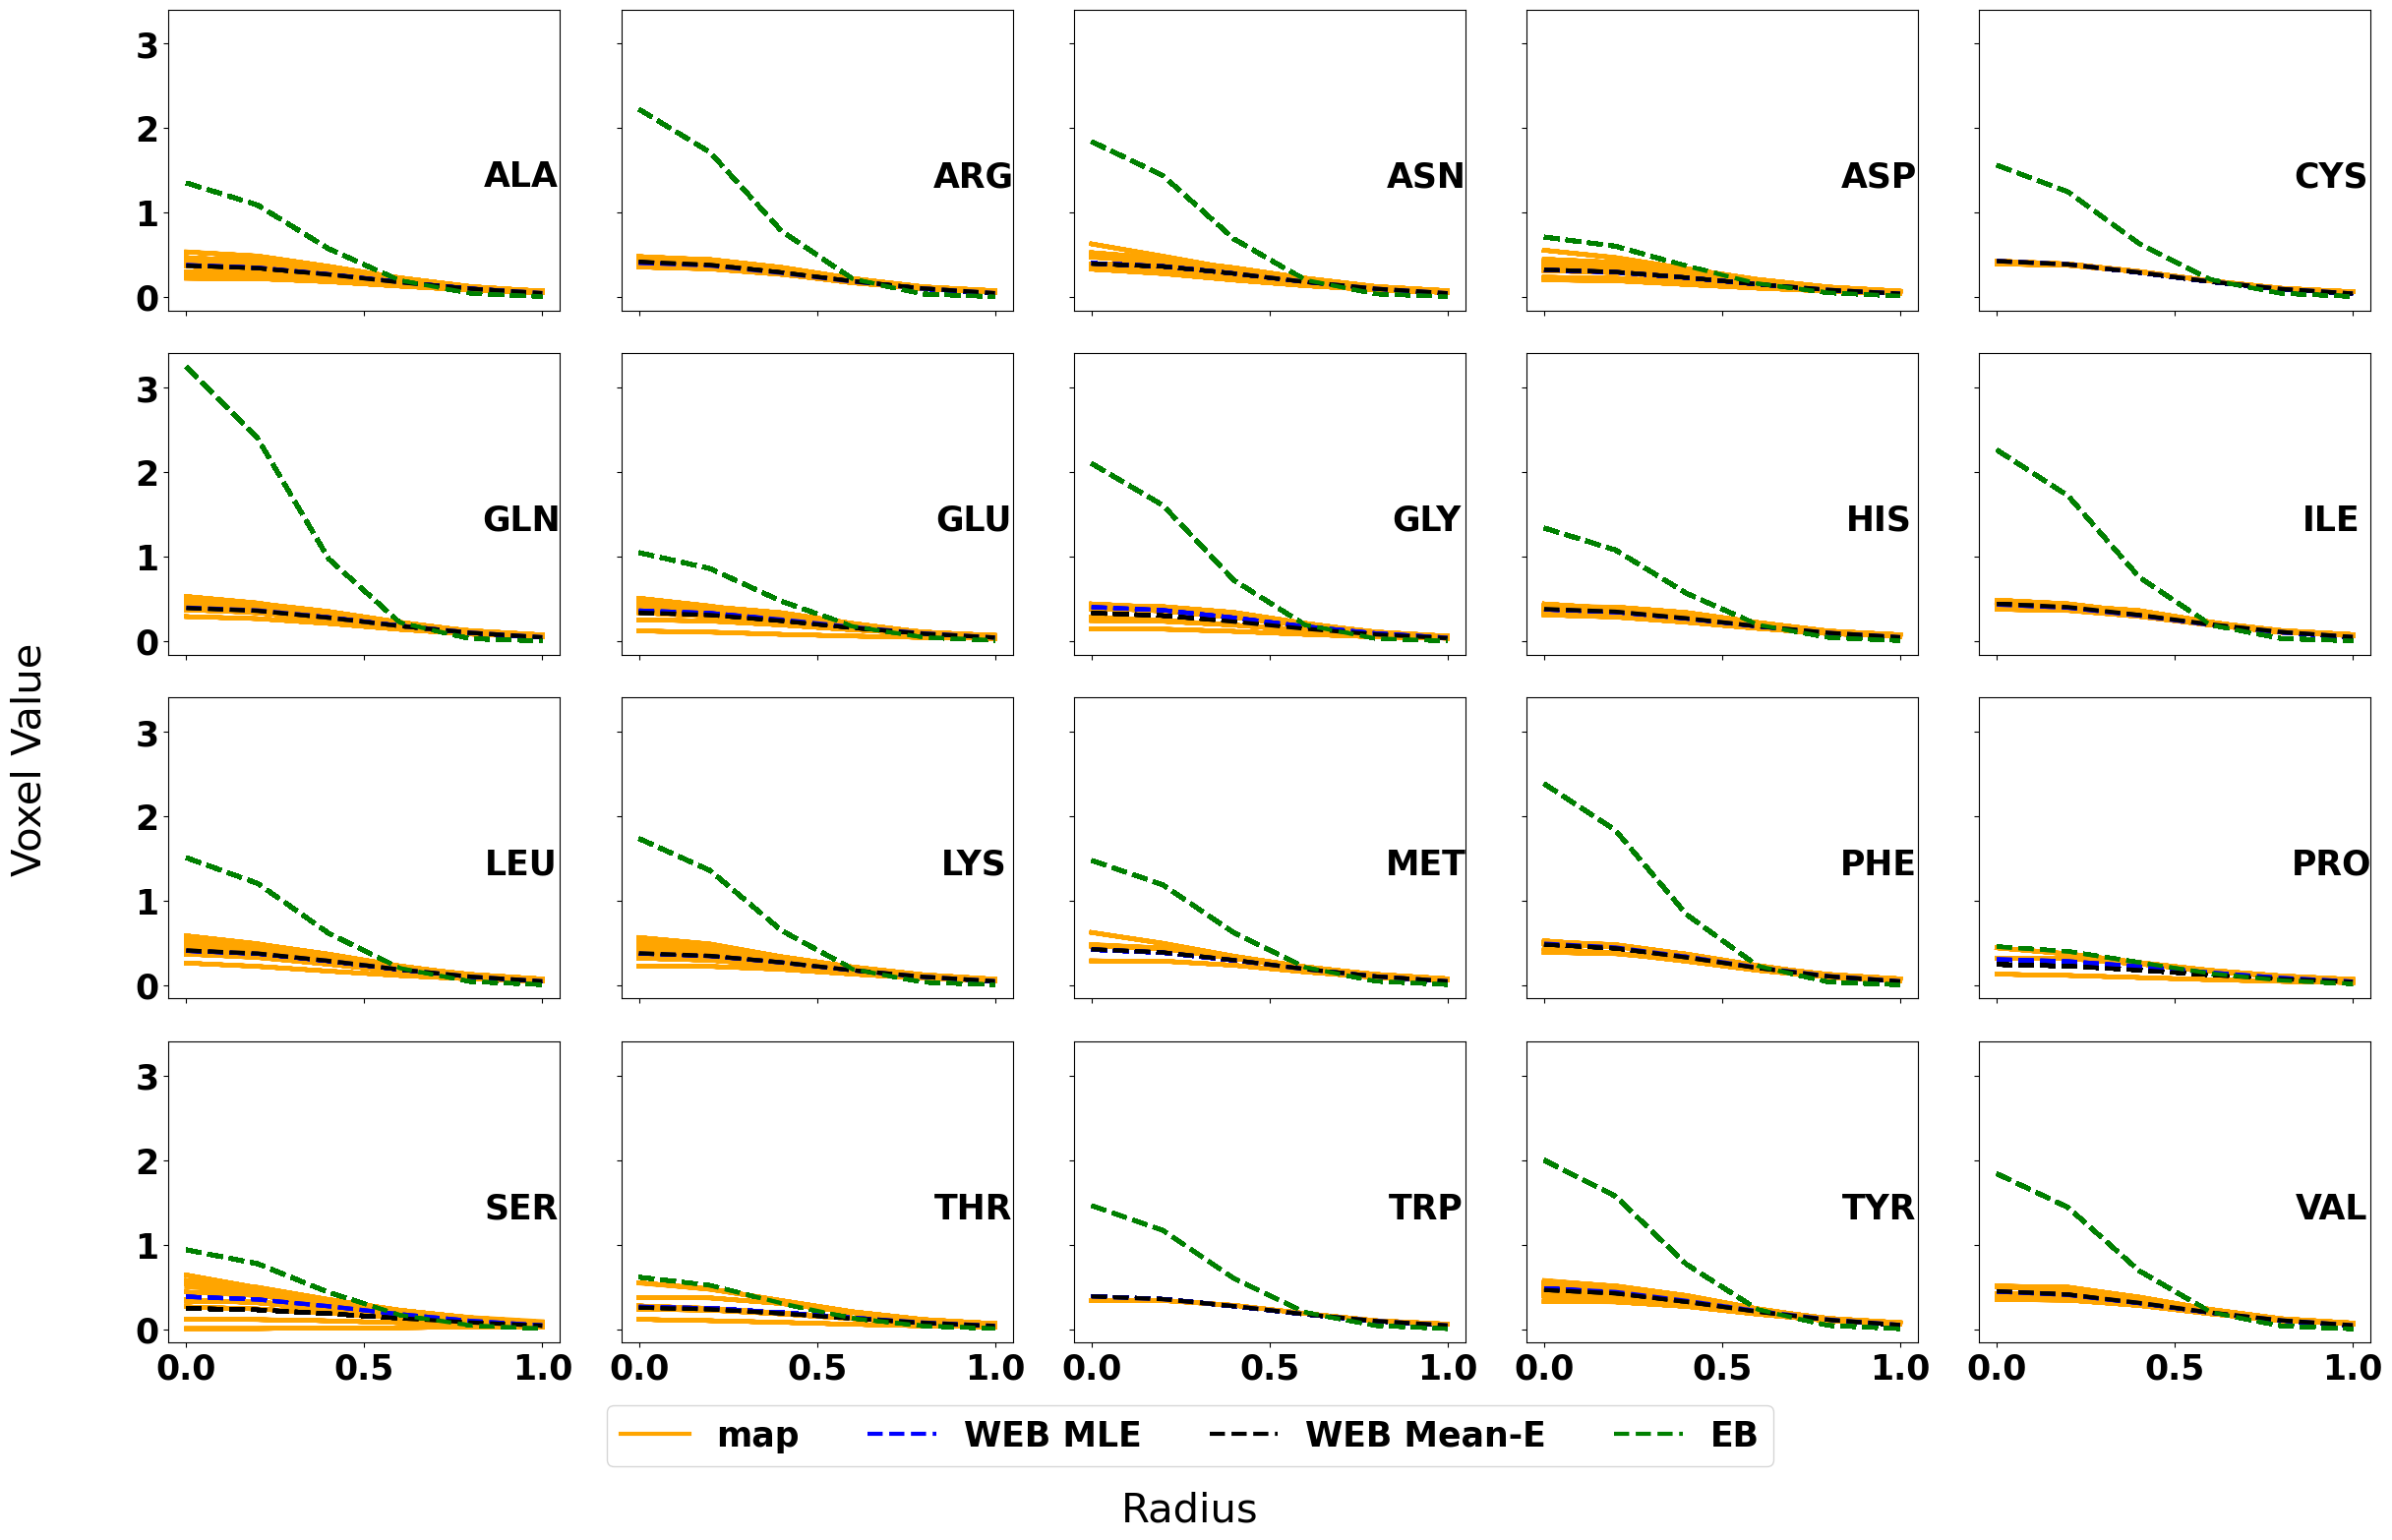

In [6]:
web.plot_data(
    root = f"./figures/densities_compared_{PROTEIN}_{EM_MAP}_EB", 
    estimators = ["WEB MLE", "WEB Mean-E", "EB"]
    )

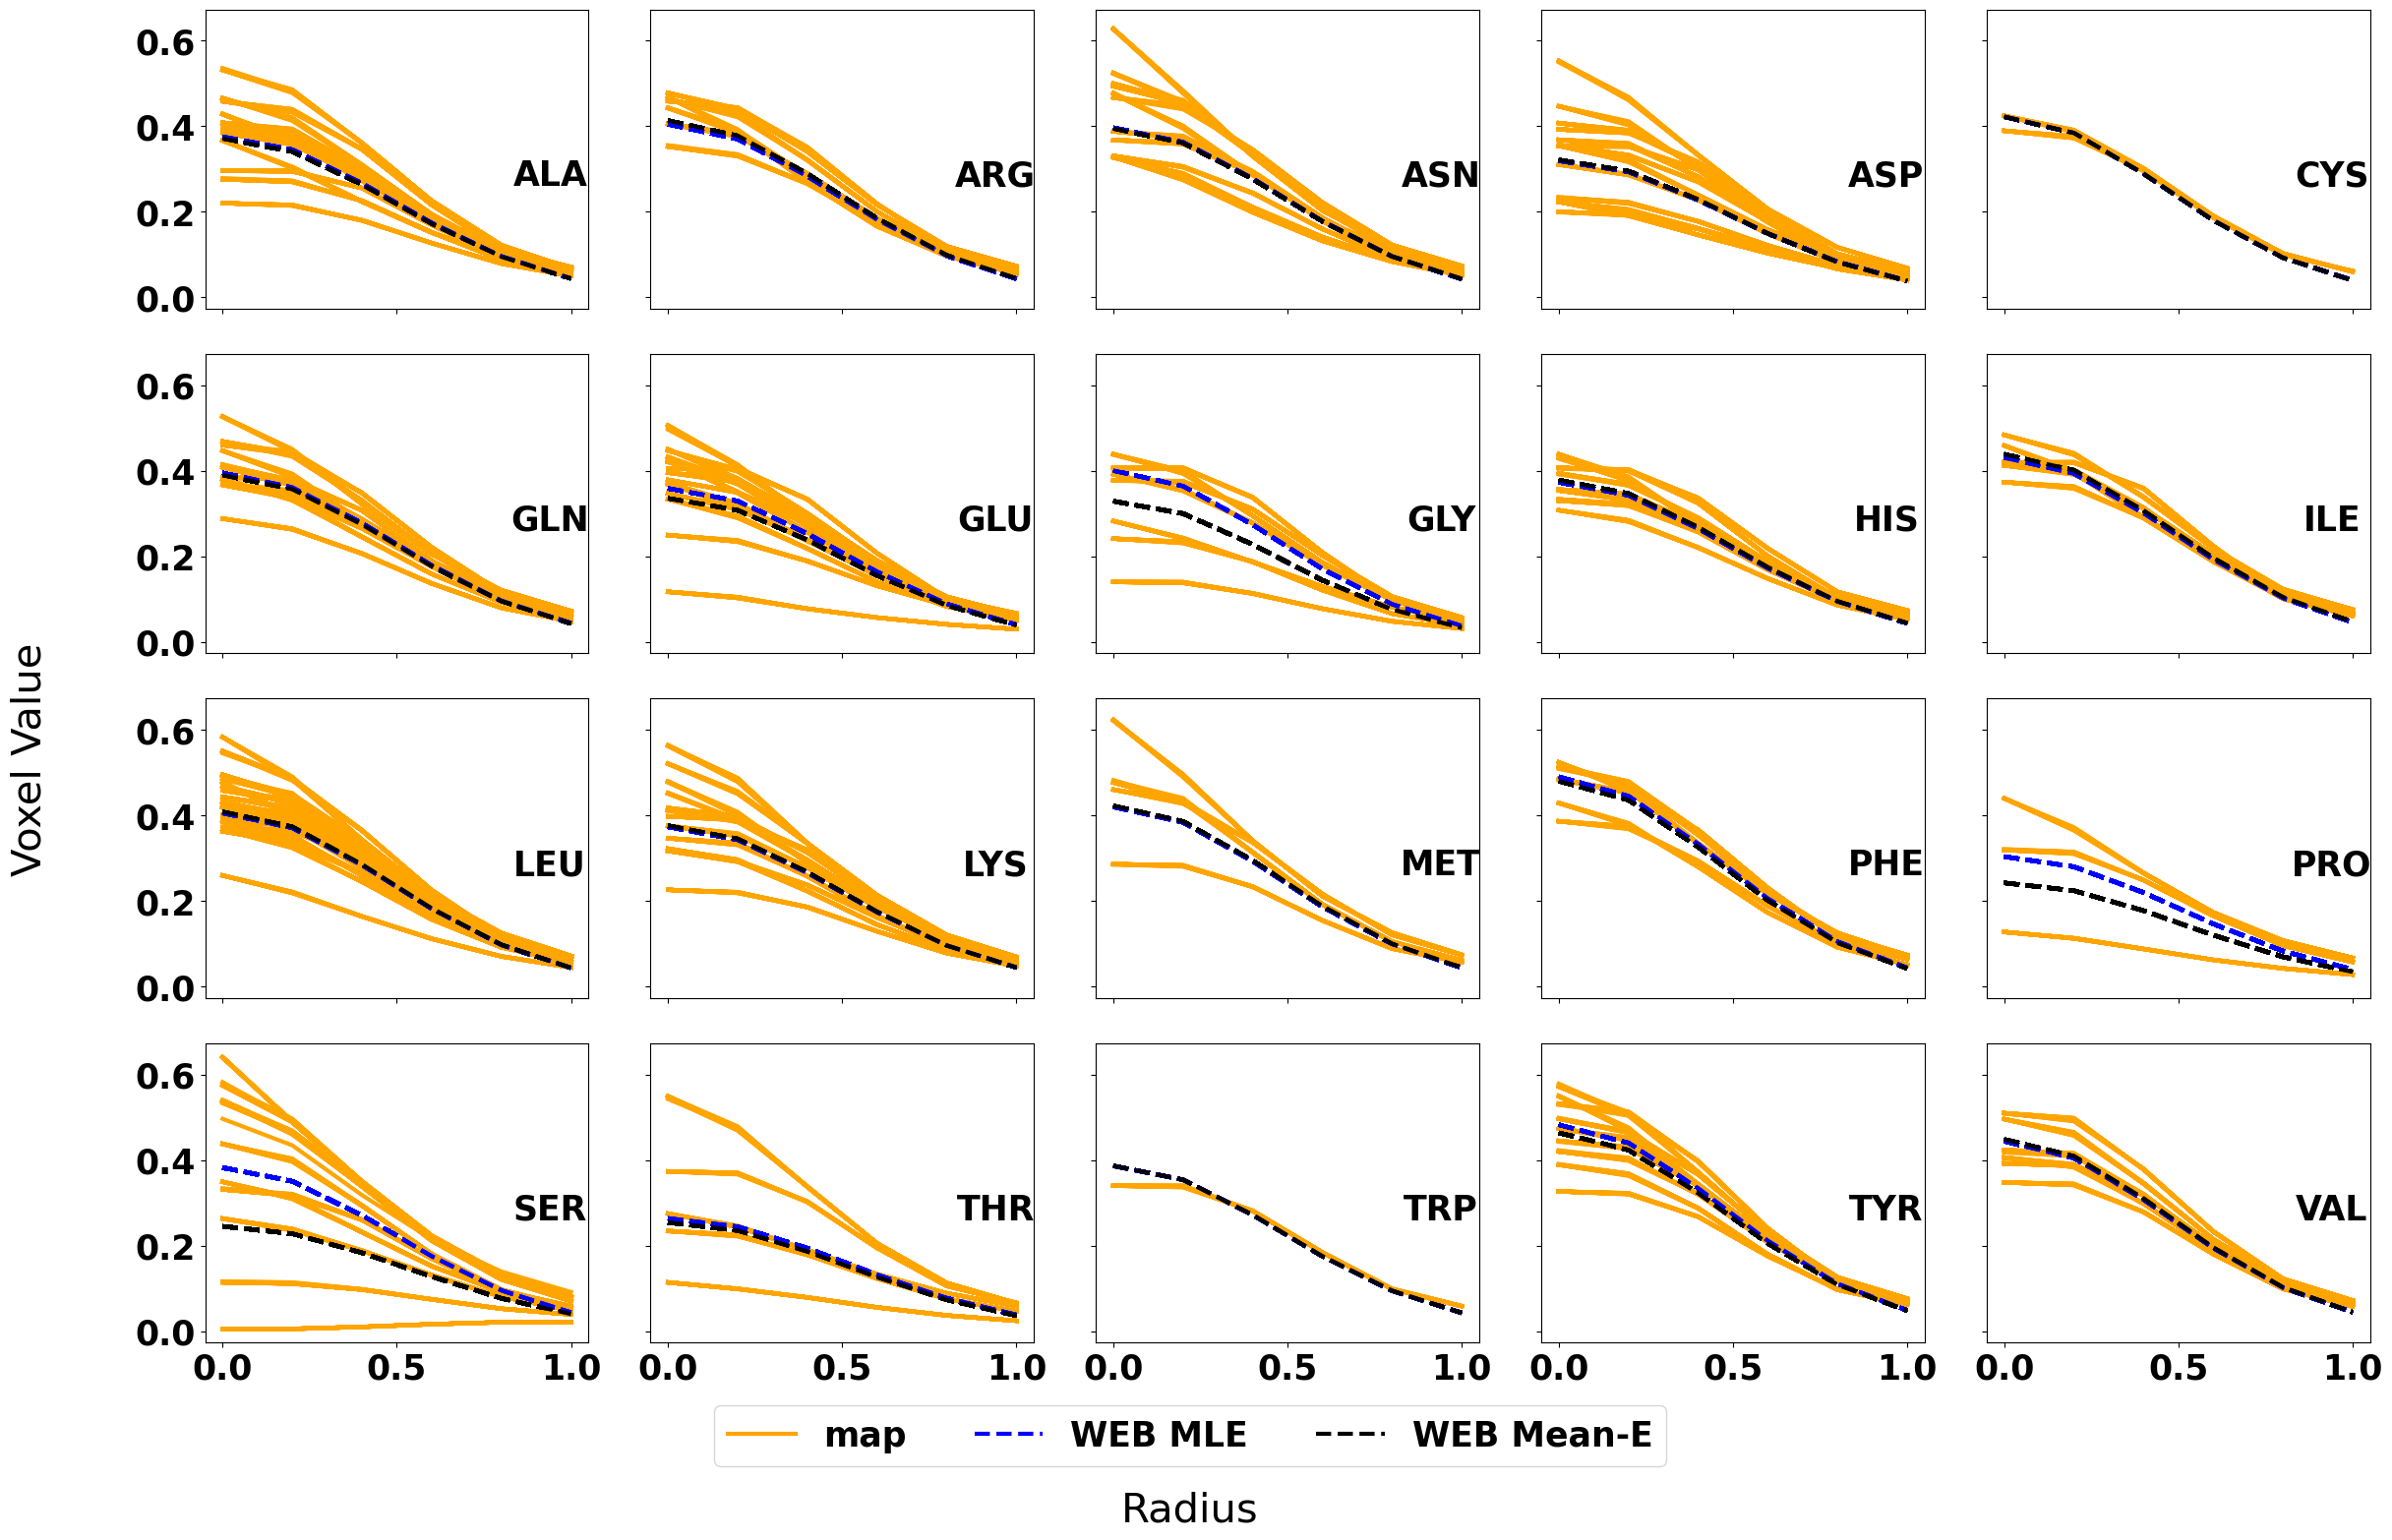

In [7]:
web.plot_data(
    root = f"./figures/densities_compared_{PROTEIN}_{EM_MAP}", 
    estimators = ["WEB MLE", "WEB Mean-E"]
    )

Find outliers

In [8]:
outliers, statistic_distances = web.find_outliers()

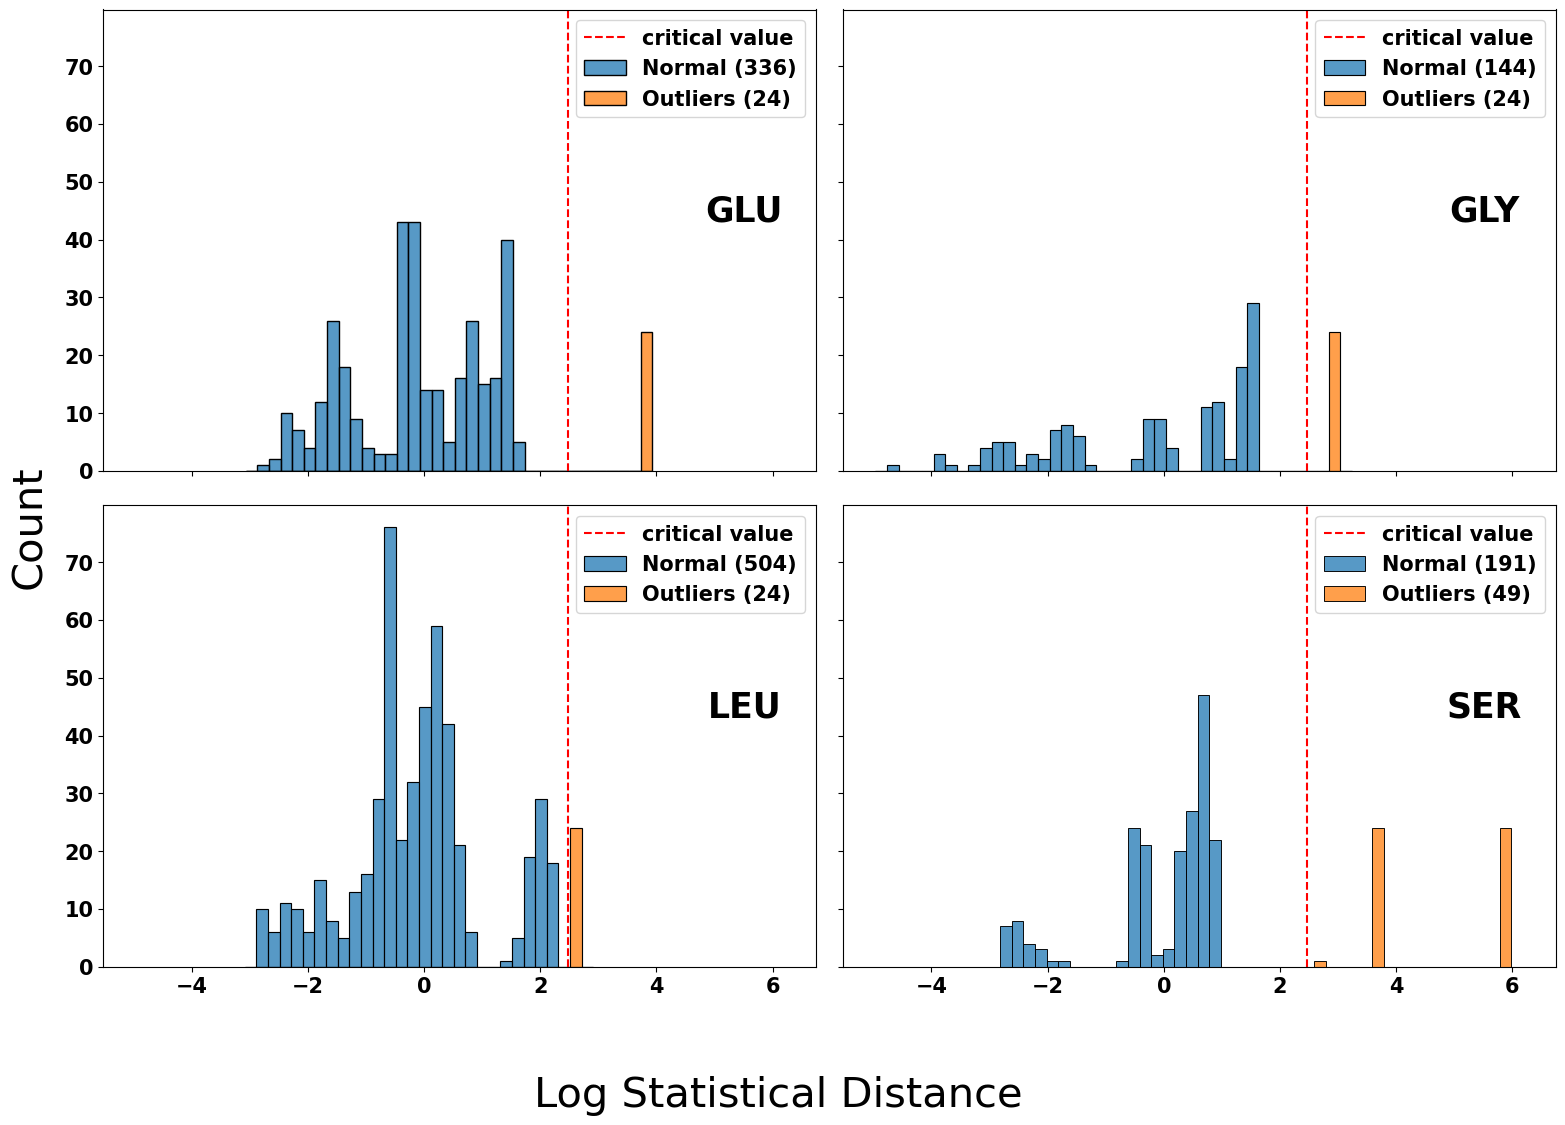

In [9]:
web.distances_hist(f"./figures/distances_hist_{PROTEIN}_{EM_MAP}")

/Users/zhengshucheng/Desktop/中研院/QEB/WEB/utils.py:372: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(betas_WEB[name][normal_index][:, 0], betas_WEB[name][normal_index][:, 1], 'ro', c='blue')
/Users/zhengshucheng/Desktop/中研院/QEB/WEB/utils.py:373: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(betas_WEB[name][outliers[name]][:, 0], betas_WEB[name][outliers[name]][:, 1], 'ro', c='#ff7f0e')


<Figure size 640x480 with 0 Axes>

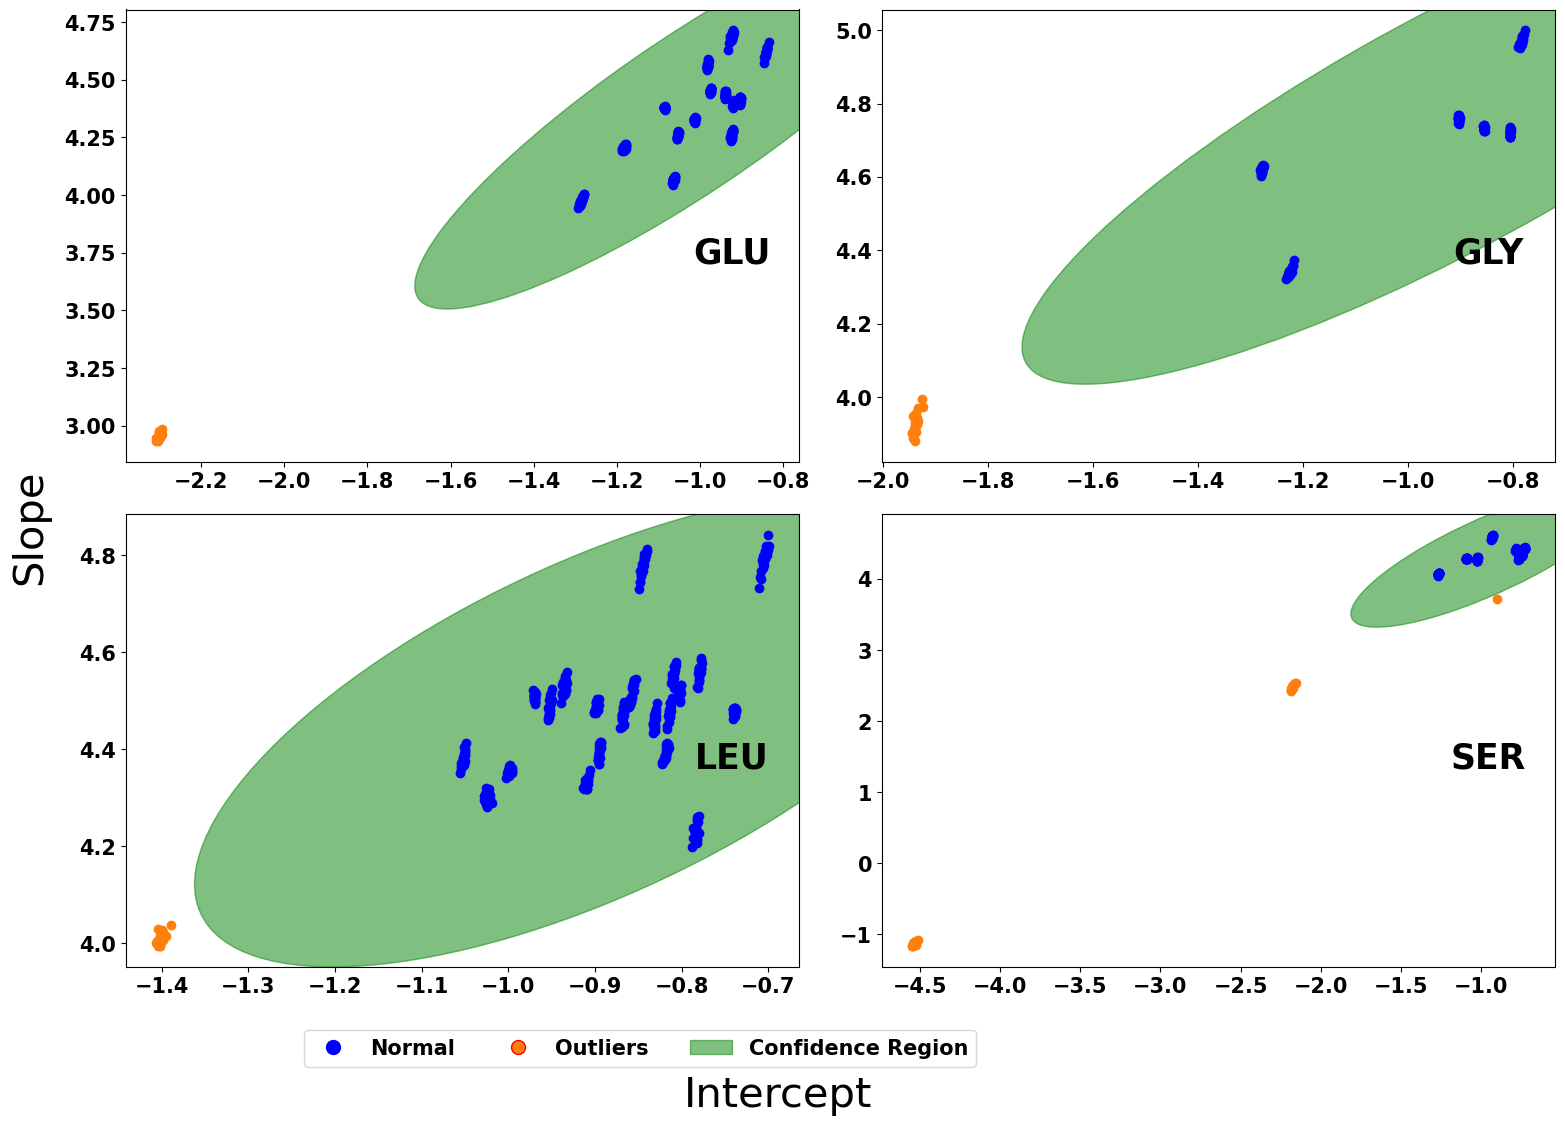

In [10]:
web.confidence_regions_plot(f"./figures/confidence_regions_plot_{PROTEIN}_{EM_MAP}")

<Figure size 640x480 with 0 Axes>

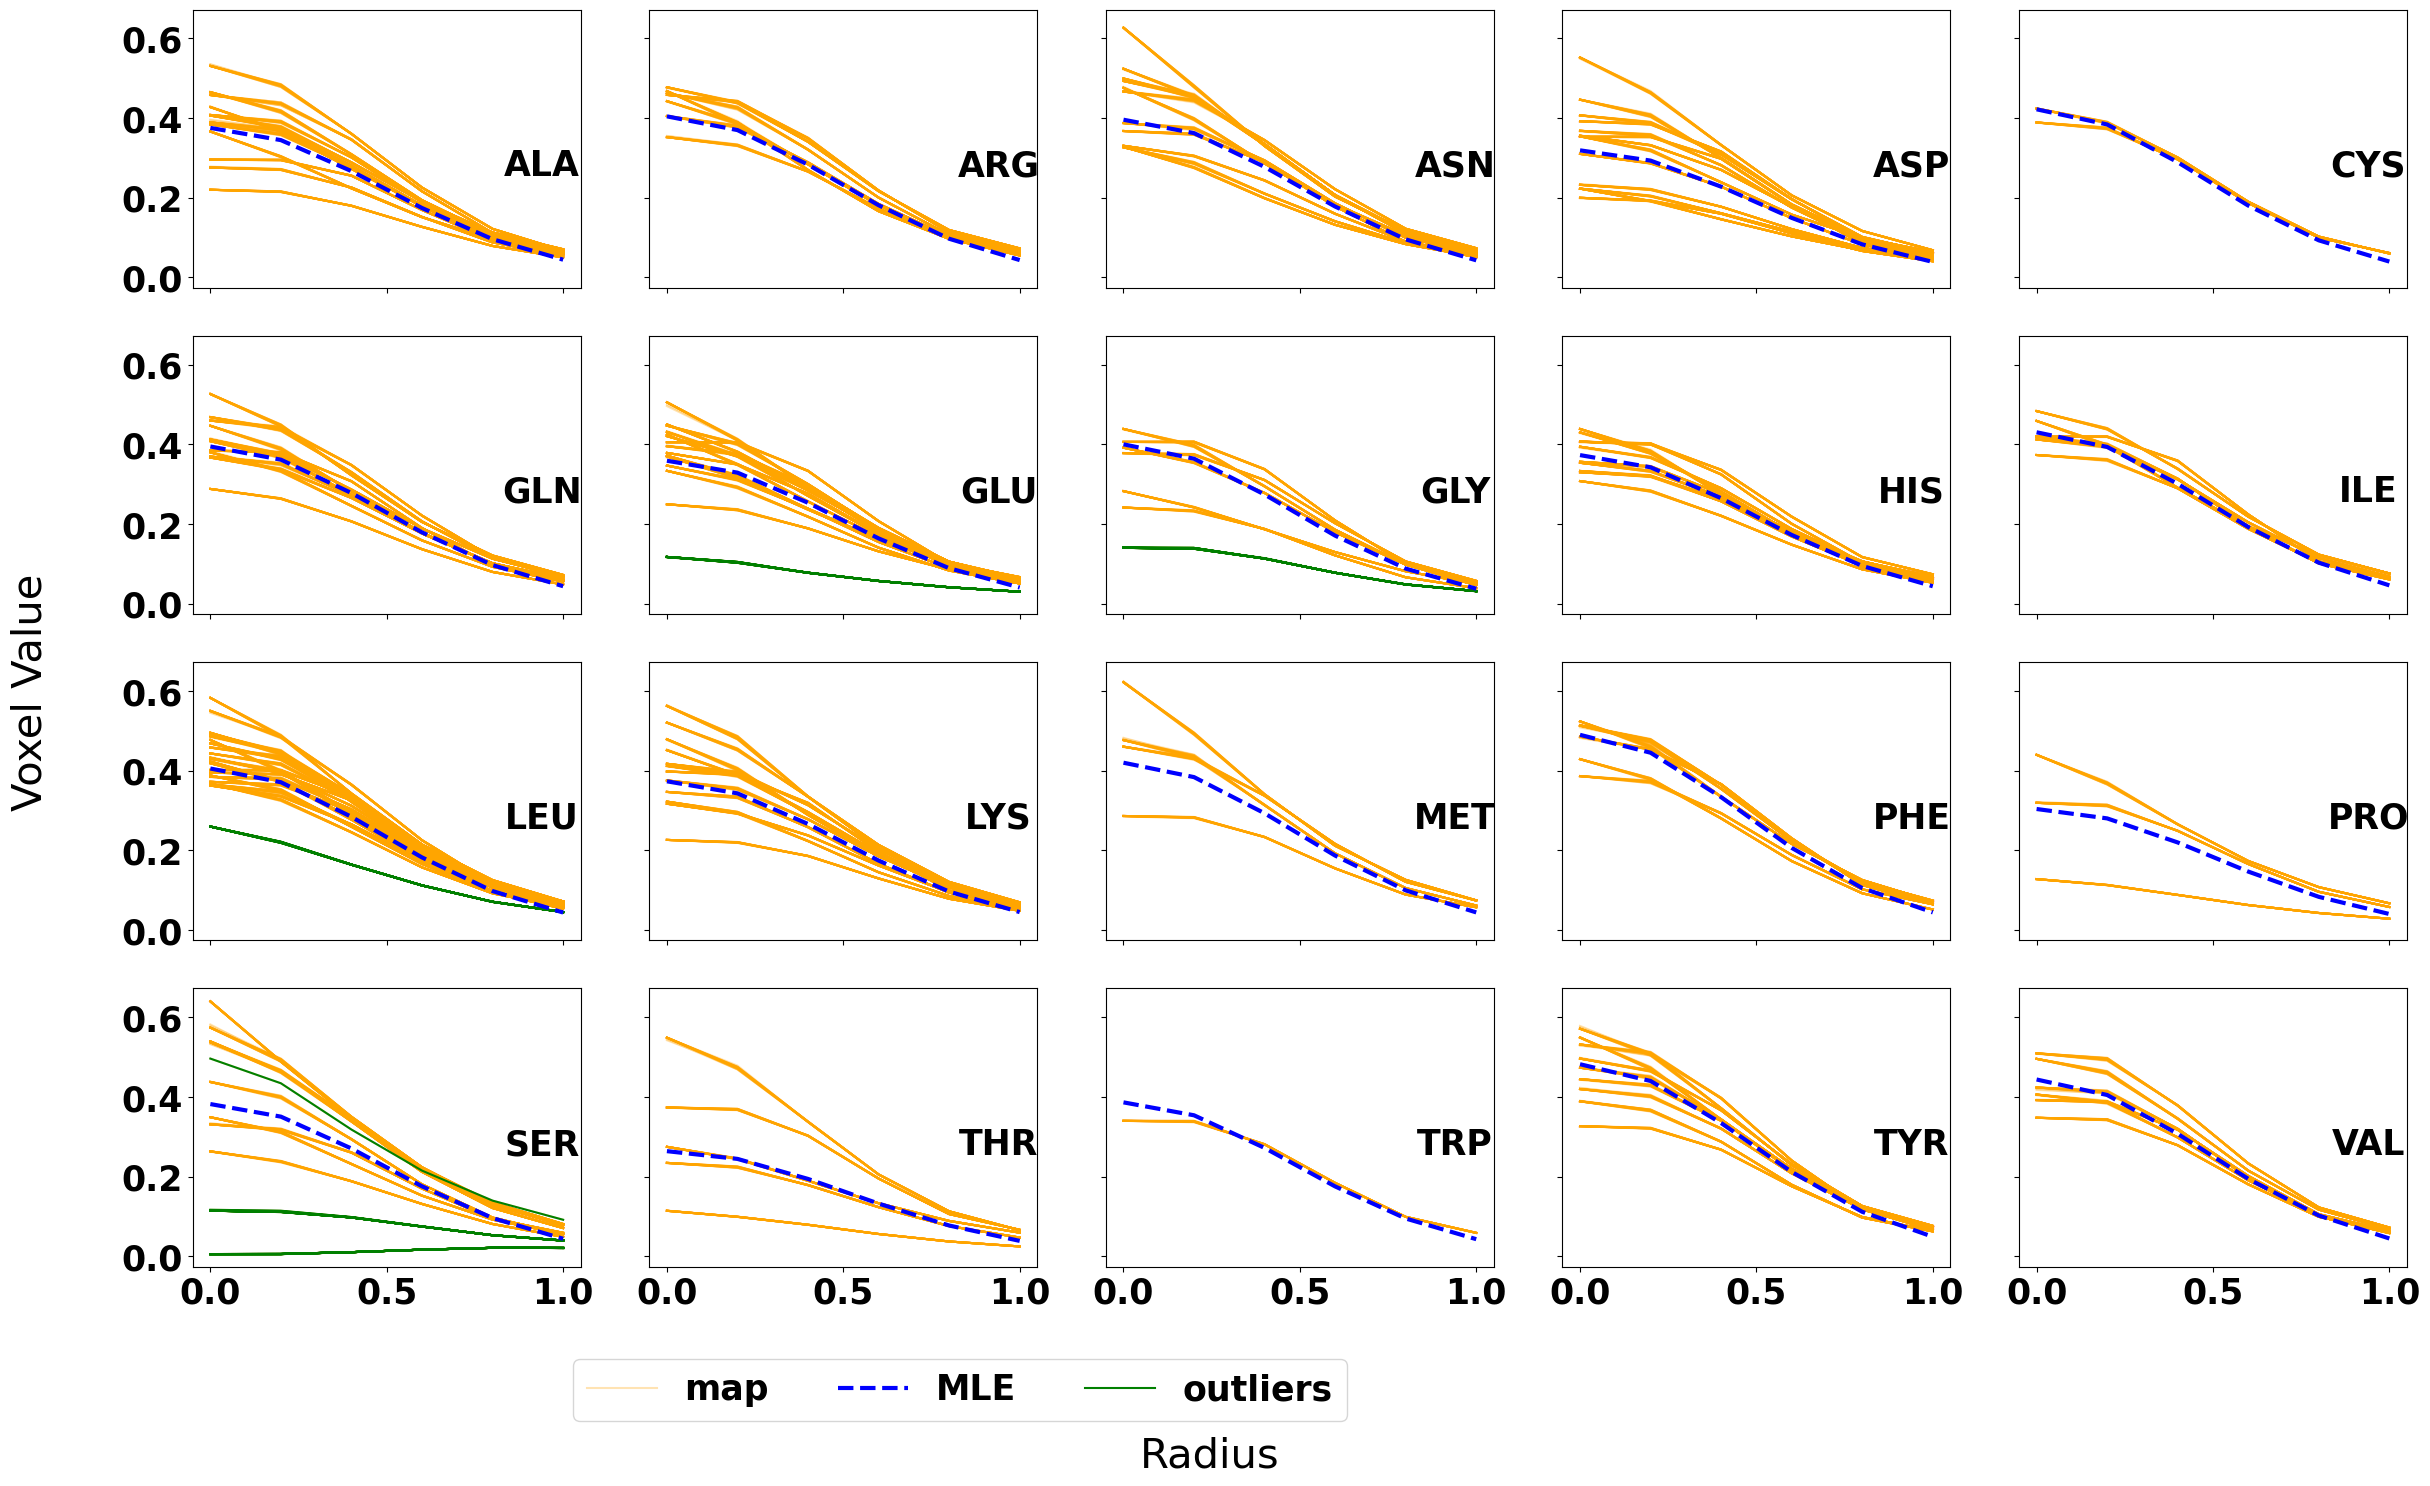

In [11]:
web.outliers_density_plot(f"./figures/outliers_density_plot_{PROTEIN}_{EM_MAP}")